In [30]:
# Raw data
import torch
X = torch.arange(-3,3,0.1)

In [31]:
f = -3 * X * X
Y = f + 0.5 * torch.randn(X.size())

In [32]:
# Because the Y has to be an array, therefore we 
# use the plus and multiply 

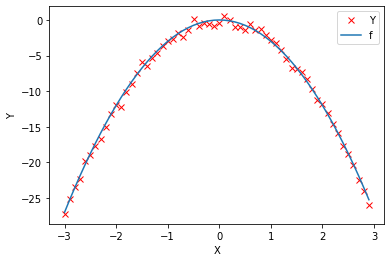

In [33]:
# Let's plot it out
import matplotlib.pylab as plt
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f, label = 'f')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [34]:
def forward(x):
    return w * x

In [35]:
def criterion(Yhat, Y):
    return torch.mean((Yhat - Y)**2)

In [36]:
LOSS = []
lr = 0.1
w = torch.tensor(-10.0, requires_grad = True)

In [37]:
class plot_diagram():
    def __init__(self, X, Y, w, end_parameter_value):
        self.Y = Y.detach().numpy()
        self.error = []
        self.parameter = []
        parameter_start_value = w.data
        self.parameter_list = torch.arange(
            parameter_start_value, end_parameter_value)
        self.loss_over_parameters = [
            criterion(forward(X), Y) 
            for w.data in self.parameter_list]
        self.loss_list = []
        for each in self.loss_over_parameters:
            self.loss_list.append(each.detach().item())
        w.data = parameter_start_value
        
    def __call__(self, Yhat, error,  w):

        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(X, Yhat.detach().numpy(), label = 'Prediction')
        plt.plot(X, self.Y, 'ro', label = 'actual')
        plt.ylabel('Predicted Value')
        plt.xlabel('X')
        plt.legend()
        
        plt.subplot(211)
        
        plt.title("Prediction/Inputs and Loss/Parameter")
            
        plt.plot(self.parameter_list, self.loss_list, 
                  label = 'LOSS')
        plt.plot(self.parameter, self.error,
                 'ro', label = 'Gradient LOSS')
        plt.xlabel('Parameter')
        plt.ylabel('LOSS')
        plt.legend()
        plt.figure()

In [38]:
diagram_generator = plot_diagram(X, Y, w, 5)

In [39]:
def train(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        print("The Yhat is ")
        print(Yhat)
        print("The w is ")
        print(w)
        loss = criterion(Yhat, Y)
        diagram_generator(Yhat, loss.item(), w)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

The Yhat is 
tensor([ 30.,  29.,  28.,  27.,  26.,  25.,  24.,  23.,  22.,  21.,  20.,  19.,
         18.,  17.,  16.,  15.,  14.,  13.,  12.,  11.,  10.,   9.,   8.,   7.,
          6.,   5.,   4.,   3.,   2.,   1.,  -0.,  -1.,  -2.,  -3.,  -4.,  -5.,
         -6.,  -7.,  -8.,  -9., -10., -11., -12., -13., -14., -15., -16., -17.,
        -18., -19., -20., -21., -22., -23., -24., -25., -26., -27., -28., -29.],
       grad_fn=<MulBackward0>)
The w is 
tensor(-10., requires_grad=True)
The Yhat is 
tensor([ 11.1447,  10.7732,  10.4017,  10.0302,   9.6587,   9.2872,   8.9157,
          8.5442,   8.1728,   7.8013,   7.4298,   7.0583,   6.6868,   6.3153,
          5.9438,   5.5723,   5.2008,   4.8294,   4.4579,   4.0864,   3.7149,
          3.3434,   2.9719,   2.6004,   2.2289,   1.8574,   1.4860,   1.1145,
          0.7430,   0.3715,  -0.0000,  -0.3715,  -0.7430,  -1.1145,  -1.4860,
         -1.8574,  -2.2289,  -2.6004,  -2.9719,  -3.3434,  -3.7149,  -4.0864,
         -4.4579,  -4.8294,  -5

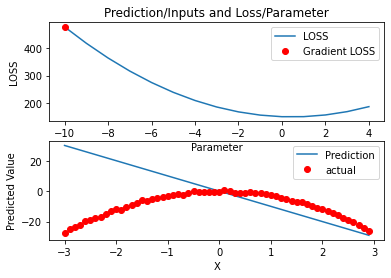

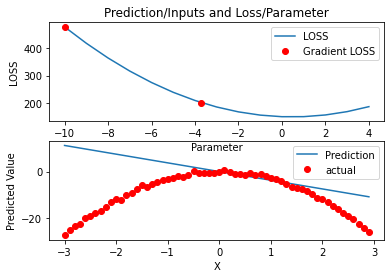

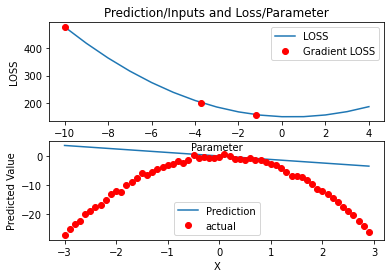

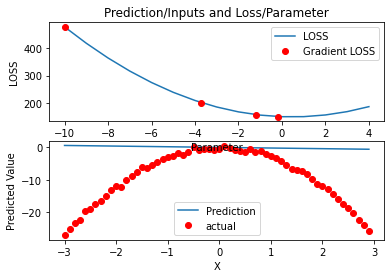

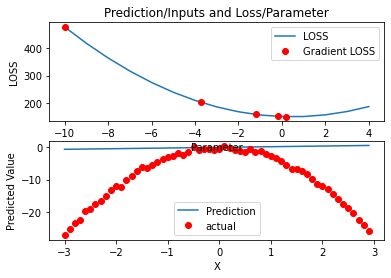

<Figure size 432x288 with 0 Axes>

In [40]:
train(5)